In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn support vector machine
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import pandas as pd
import dtreeviz

/var/folders/gc/n9f0hqw521d0_z3nmf82zyrc0000gn/T/ipykernel_2543/2409073170.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

# Path of CVC file
csv_path = "heart_disease_uci.csv"

In [3]:
# Reading the path of CVC file and going to store in df file
df = pd.read_csv(csv_path)


In [4]:
#  by using this method i saw the structure of the data and coloum name. In actual basic data heriricy of this CVC
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
#its show the summery information about the data types, non-null values, and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.describe()


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [7]:

# Convert the values if 0 its mean there is fine and no sikness otherwise any value mean thee is something wrong and fine some illness
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else x)

In [8]:
# Converting the String values into integer
for column in df.columns:
    # Check if the column data type is 'object' (which usually indicates strings)
    if df[column].dtype == 'object':
        # Convert string values to numeric values using categorical codes
        df[column] = df[column].astype('category').cat.codes



In [9]:
# After converting all values into integer lets check the table data, if everything is in correct formate as we are expecting
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [10]:
#The count of missing values (NaN) for each column in the DataFrame
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalch       55
exang         0
oldpeak      62
slope         0
ca          611
thal          0
num           0
dtype: int64

In [11]:
# we are going to drop CA
#df = df.drop("ca", axis= 1)
#df = df[df[["trestbps","chol", "thalch", "oldpeak" ]].notna()]
df = df.dropna(how="any")

In [12]:
# after removing the NAN and missing values, data looks clean for regression
df.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [13]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,677,60,1,2,0,130.0,0.0,-1,2,130.0,1,1.1,0,1.0,-1,1
691,692,62,1,2,3,120.0,0.0,-1,0,134.0,0,-0.8,1,2.0,-1,1
717,718,72,1,2,2,160.0,0.0,-1,0,114.0,0,1.6,1,2.0,-1,0
748,749,56,1,3,0,120.0,100.0,0,1,120.0,1,1.5,1,0.0,2,1


In [14]:
# Here we are checking the duplicates values, if there is any number then we will remove it as well.
df.duplicated().sum()

0

In [15]:
# first removed the colum num for targeted variable and then store this colum in to y
# X contain all the colum accept num and num is stored in y value
X = df.drop('num', axis= 1)
y = df['num']

In [16]:
# Fit the decision tree classifier with default hyper-parameters
clf = DecisionTreeClassifier()
model = clf.fit(X, y)

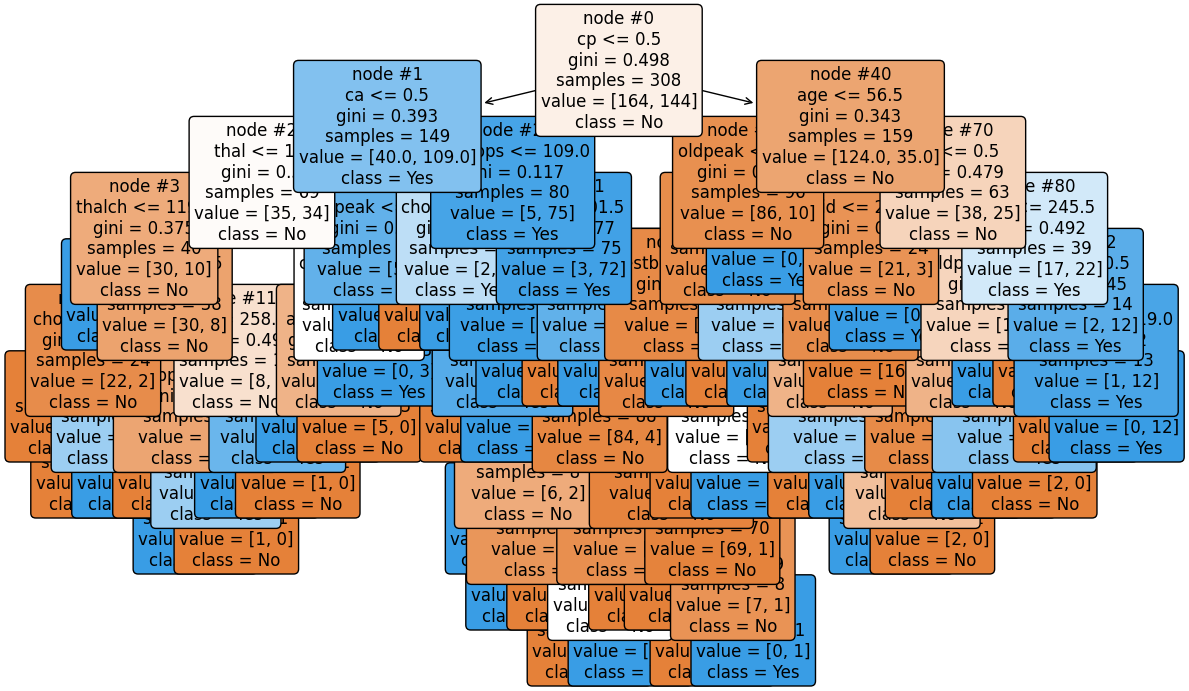

In [17]:

# Based on this data and tree we can clearly see the CP is most important keyword.
from sklearn.tree import export_graphviz
import subprocess
from sklearn import tree

fig = plt.figure(figsize=(14,8))
_ = tree.plot_tree(clf, 
                  feature_names=X.columns,  
                  class_names=["No", "Yes"],
                  filled=True, rounded=True, fontsize=12, node_ids=True
                  )

In [18]:
from sklearn.tree import export_graphviz
import subprocess
from sklearn import tree

# Export the decision tree to DOT format
export_graphviz(clf, 
                   feature_names=X.columns,  
                   class_names=["No", "Yes"],
                   filled=True, rounded=True, node_ids=True, out_file='tree.dot')

# Convert DOT to SVG
subprocess.call(['dot', '-Tsvg', 'tree.dot', '-o', 'dt_titanic_test_sk.svg'])

0